<a href="https://colab.research.google.com/github/Abhi08ch/CodVeda-Technologies/blob/main/L2_Task_1_Logistic_Regression_for_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEVEL-2**

# **Task 1: Logistic Regression for Binary Classification**

In [3]:
# 1. Import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
# 2. Load the dataset

df = pd.read_csv("/content/churn-bigml-80.csv")
print(df.head())
print(df.info())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [7]:
# 3. Preprocessing the data
df = df.drop(['State', 'Area code'], axis=1)

df['Churn'] = df['Churn'].astype(int)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

x=df.drop('Churn', axis=1)
y=df['Churn']

# Check for NaN just in case
print("Any NaNs left in X?", x.isnull().values.any())
print("Any NaNs left in y?", y.isnull().values.any())

Any NaNs left in X? False
Any NaNs left in y? False


In [8]:
# 4. Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# 5. Train Logistic regression
model = LogisticRegression(class_weight='balanced',max_iter=1600)
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1600)

In [11]:
# 6. Model Evaluation

y_pred = model.predict(x_test)

print('Accuracy:', accuracy_score(y_pred, y_test))
print('Precision score:', precision_score(y_pred, y_test))
print('Recall:', recall_score(y_pred, y_test))

y_probs = model.predict_proba(x_test)[:,1]
print('ROC-AUC Score:', roc_auc_score(y_pred, y_probs))

Accuracy: 0.7490636704119851
Precision score: 0.6666666666666666
Recall: 0.325
ROC-AUC Score: 1.0


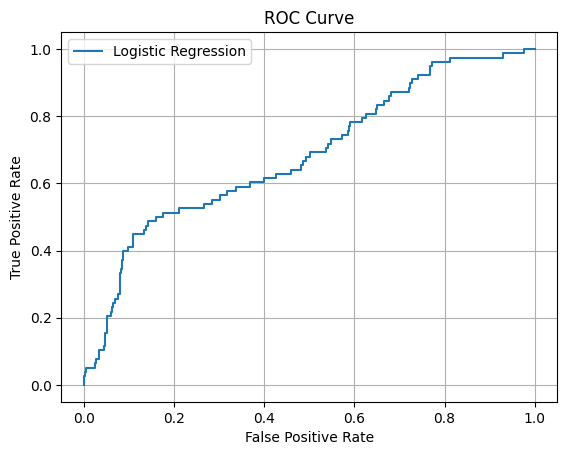

In [14]:
# 7. PLotting the roc-curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()